In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
adult_data = pd.read_csv('adult.data.csv')

In [4]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
adult_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [29]:
adult_data[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [34]:
np.mean(adult_data[adult_data[' sex']==' Female']['age'])

36.85823043357163

In [49]:
number_of_rows = adult_data[adult_data[' native-country']==' Germany'].shape[0]
total_rows = adult_data.shape[0]
print(number_of_rows, total_rows)
print ("Percentage : ",number_of_rows*100/total_rows)
#adult_data[' native-country'].unique()

137 32561
Percentage :  0.42074874850281013


In [58]:
salary_more_than_50k_age = adult_data[adult_data[' salary']==' >50K']['age']
print ("mean : ",np.mean(salary_more_than_50k_age))
print ("std : ",np.std(salary_more_than_50k_age))

mean :  44.24984058155847
std :  10.518356927661575


In [59]:
salary_less_than_50k_age = adult_data[adult_data[' salary']==' <=50K']['age']
print ("mean : ",np.mean(salary_less_than_50k_age))
print ("std : ",np.std(salary_less_than_50k_age))

mean :  36.78373786407767
std :  14.019804910115214


In [66]:
salary_more_than_50k = adult_data[adult_data[' salary']==' >50K']
salary_more_than_50k[' education'].value_counts()

#more people are highly educated when their salary is more than 50k

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name:  education, dtype: int64

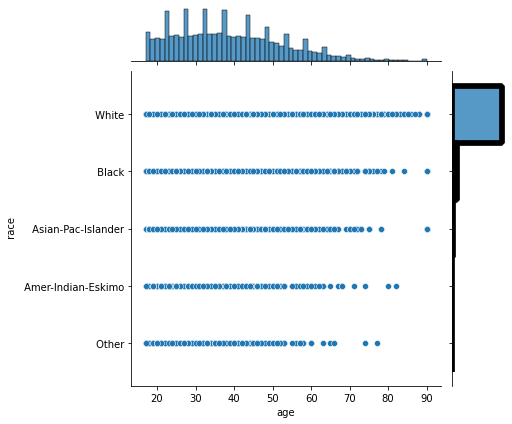

In [92]:
sns.jointplot(x='age',y=' race',data=adult_data)

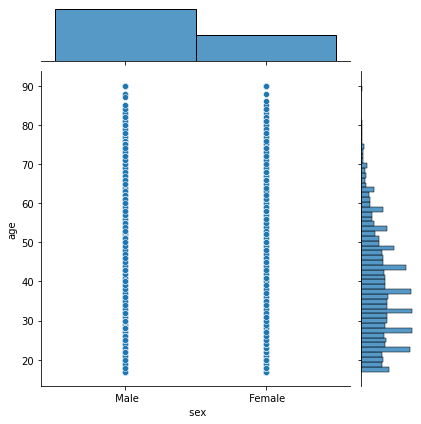

In [93]:
sns.jointplot(x=' sex',y='age',data=adult_data)

In [97]:
max_hours_per_week = adult_data[' hours-per-week'].max()
print("max work hours per week : ",max_hours_per_week)

max work hours per week :  99


In [105]:
working_max_hours = adult_data[adult_data[' hours-per-week']==max_hours_per_week]

In [110]:
# number of people working for max hours per week
no_of_adults_working_for_max_hours = working_max_hours.shape[0]
print("number of people working for max hours per week ",no_of_adults_working_for_max_hours)

number of people working for max hours per week  85


In [118]:
no_of_adults_earning_more = working_max_hours[working_max_hours[' salary']==' >50K'].shape[0]
print(" percentage of people working for max hours and also earning more than 50K is ",
      (no_of_adults_earning_more*100)/no_of_adults_working_for_max_hours)

 percentage of people working for max hours and also earning more than 50K is  29.41176470588235


In [147]:
sal_little = adult_data[adult_data[' salary']==' <=50K']
sal_little.groupby(by=' native-country')[' hours-per-week'].mean()

 native-country
 ?                             40.164760
 Cambodia                      41.416667
 Canada                        37.914634
 China                         37.381818
 Columbia                      38.684211
 Cuba                          37.985714
 Dominican-Republic            42.338235
 Ecuador                       38.041667
 El-Salvador                   36.030928
 England                       40.483333
 France                        41.058824
 Germany                       39.139785
 Greece                        41.809524
 Guatemala                     39.360656
 Haiti                         36.325000
 Holand-Netherlands            40.000000
 Honduras                      34.333333
 Hong                          39.142857
 Hungary                       31.300000
 India                         38.233333
 Iran                          41.440000
 Ireland                       40.947368
 Italy                         39.625000
 Jamaica                       38.239437


In [134]:
sal_more = adult_data[adult_data[' salary']==' >50K']
sal_more.groupby(by=' native-country')[' hours-per-week'].mean()

 native-country
 ?                     45.547945
 Cambodia              40.000000
 Canada                45.641026
 China                 38.900000
 Columbia              50.000000
 Cuba                  42.440000
 Dominican-Republic    47.000000
 Ecuador               48.750000
 El-Salvador           45.000000
 England               44.533333
 France                50.750000
 Germany               44.977273
 Greece                50.625000
 Guatemala             36.666667
 Haiti                 42.750000
 Honduras              60.000000
 Hong                  45.000000
 Hungary               50.000000
 India                 46.475000
 Iran                  47.500000
 Ireland               48.000000
 Italy                 45.400000
 Jamaica               41.100000
 Japan                 47.958333
 Laos                  40.000000
 Mexico                46.575758
 Nicaragua             37.500000
 Peru                  40.000000
 Philippines           43.032787
 Poland                39.0

In [142]:
japan_more = sal_more.groupby(by=' native-country')[' hours-per-week'].mean()

In [143]:
japan_more[' Japan']

47.958333333333336

In [144]:
japan_less = sal_little.groupby(by=' native-country')[' hours-per-week'].mean()

In [145]:
japan_less[' Japan']

41.0